In [1]:
import pandas as pd
import seaborn as sns

netflix = pd.read_csv('nf_movies.csv')
nf = netflix.copy()

## 1. Data Wrangling

### Removing Duplicate Rows

In [2]:
nf.duplicated().value_counts()

False    9957
dtype: int64

### Removing unwanted columns

In [3]:
nf.shape

(9957, 9)

In [4]:
nf = nf.drop(columns = 'description')

### Dealing with NULL values

In [5]:
nf.isna().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
stars             0
votes          1173
dtype: int64

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   stars        9957 non-null   object 
 7   votes        8784 non-null   object 
dtypes: float64(1), object(7)
memory usage: 622.4+ KB


<AxesSubplot:>

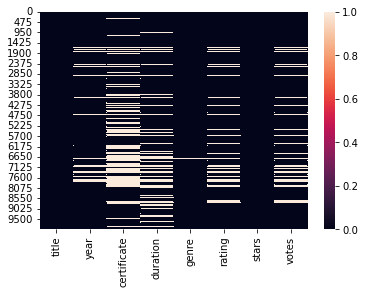

In [7]:
sns.heatmap(nf.isna())

In [8]:
nf['votes'] = nf.votes.fillna(0)

### Correcting data into usable form

In [9]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   stars        9957 non-null   object 
 7   votes        9957 non-null   object 
dtypes: float64(1), object(7)
memory usage: 622.4+ KB


In [10]:
nf["year"] = nf["year"].str.extract(r'(\d+)')

In [11]:
nf['year'] = nf['year'].str[0:4]

In [12]:
nf['year'] = nf.year.fillna(0)

In [13]:
nf['year'] = pd.to_datetime(nf['year'])
nf['year'] = nf['year'].dt.year

In [14]:
nf['duration_copy'] = nf['duration'].str.strip(' min').astype(float)

In [15]:
nf['duration_copy'] = nf['duration_copy'].fillna(0)

In [16]:
nf['votes'] = nf.votes.fillna(0)

In [17]:
nf['votes'] = nf.votes.str.replace(',','').astype(float)

In [18]:
nf['genre'] = nf['genre'].fillna('Unknown')

In [19]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          9957 non-null   object 
 1   year           9957 non-null   int64  
 2   certificate    6504 non-null   object 
 3   duration       7921 non-null   object 
 4   genre          9957 non-null   object 
 5   rating         8784 non-null   float64
 6   stars          9957 non-null   object 
 7   votes          8784 non-null   float64
 8   duration_copy  9957 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 700.2+ KB


## 2. Descriptive analysis

#### Highest rated movie

In [20]:
nf.nlargest(1, 'rating', keep='all')

,title,year,certificate,duration,genre,rating,stars,votes,duration_copy
9444,BoJack Horseman,2014,TV-MA,26 min,"Animation, Comedy, Drama",9.9,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...",16066.0,26.0


#### Longest duration movie with highest rating

In [21]:
nf.nlargest(3, columns=['duration_copy', 'rating'])

,title,year,certificate,duration,genre,rating,stars,votes,duration_copy
943,The Vietnam War,2017,TV-MA,990 min,"Documentary, History, War",9.1,"['Peter Coyote, ', 'Huy Duc, ', 'James Willban...",24632.0,990.0
2116,The Time in Between,2013,NaN,853 min,"Adventure, Drama, History",8.3,"['Adriana Ugarte, ', 'Mari Carmen Sánchez, ', ...",4258.0,853.0
989,The Staircase,2004,TV-MA,629 min,"Documentary, Crime, Drama",7.8,"['Michael Peterson, ', 'David Rudolf, ', 'Ron ...",24588.0,629.0


#### High rated movie with most votes

In [22]:
nf.nlargest(3, columns=['rating', 'votes'])

,title,year,certificate,duration,genre,rating,stars,votes,duration_copy
9444,BoJack Horseman,2014,TV-MA,26 min,"Animation, Comedy, Drama",9.9,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...",16066.0,26.0
9578,Stranger Things,2016,TV-14,98 min,"Drama, Fantasy, Horror",9.6,"['Matt Duffer, ', 'Ross Duffer', '| ', ' St...",36276.0,98.0
8259,Dexter,2006,TV-MA,56 min,"Crime, Drama, Mystery",9.6,"['Michael Cuesta', '| ', ' Stars:', 'Michae...",10604.0,56.0


#### Highest rated Comedy movie of year 2022

In [23]:
nf[(nf['genre'].str.contains('Comedy')) & (nf['year'] == 2022)].nlargest(3, 'rating')

,title,year,certificate,duration,genre,rating,stars,votes,duration_copy
4680,Sea of Love,2022,TV-Y,10 min,"Animation, Adventure, Comedy",8.8,"['Kelly B. Jones, ', 'Anchasa Bhurichayawarodo...",40.0,10.0
331,Love Between Fairy and Devil,2022,TV-PG,40 min,"Comedy, Fantasy, Romance",8.6,"['Dylan Wang, ', 'Esther Yu, ', 'Haiqiao Xu, '...",365.0,40.0
349,SPY×FAMILY,2022,TV-14,24 min,"Animation, Action, Comedy",8.6,"['Takuya Eguchi, ', 'Atsumi Tanezaki, ', 'Saor...",19612.0,24.0


#### Most repeated genre

In [24]:
z = []
def find_genre(nf):
    for x in nf['genre']:
        z.append(x)
    return max(set(z), key = z.count)

#### Movies with maximum certificate

In [25]:
nf['certificate'].value_counts().head(1)

TV-MA    2520
Name: certificate, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='year'>

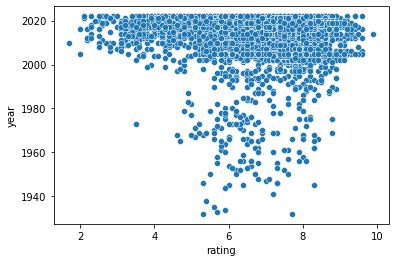

In [26]:
sns.scatterplot(data = nf, x = 'rating', y = 'year')

<AxesSubplot:xlabel='certificate', ylabel='votes'>

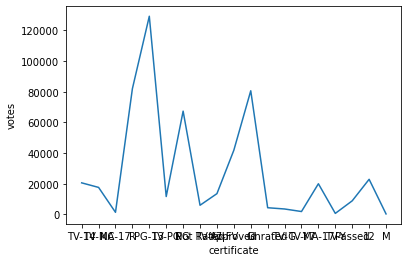

In [27]:
sns.lineplot(data = nf, x = 'certificate', y = 'votes', errorbar=None)